In [186]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup as bs
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
import time

In [281]:
chrome_driver_path = "Y:\\chromedriver-win64\\chromedriver.exe"

chrome_options = Options()
chrome_options.binary_location = "Y:\\chrome-win64\\chrome.exe"
service = Service(chrome_driver_path)

In [282]:
driver = webdriver.Chrome(service=service,options=chrome_options)

In [283]:
driver.get('https://amrtamya.com/')

'<html class="js" lang="en" style="--header-height: 189px; --swiper_dot_color: #672828;"><head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width,initial-scale=1">\n    <meta name="theme-color" content="">\n    <link rel="canonical" href="https://amrtamya.com/"><link rel="preconnect" href="https://fonts.shopifycdn.com" crossorigin=""><title>\n      amrtamyawellness\n</title>\n\n    \n\n    \n\n<meta property="og:site_name" content="amrtamyawellness">\n<meta property="og:url" content="https://amrtamya.com/">\n<meta property="og:title" content="amrtamyawellness">\n<meta property="og:type" content="website">\n<meta property="og:description" content="amrtamyawellness"><meta name="twitter:card" content="summary_large_image">\n<meta name="twitter:title" content="amrtamyawellness">\n<meta name="twitter:description" content="amrtamyawellness">\n\n\n    <script type="text/javascript" async="" src="https:
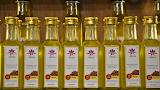
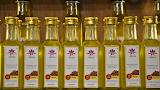
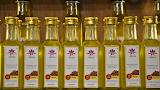

In [259]:
driver.page_source

In [23]:
soup = bs(driver.page_source, 'html.parser')

<html class="js" lang="en" style="--header-height: 189px; --swiper_dot_color: #672828;"><head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="" name="theme-color"/>
<link href="https://amrtamya.com/" rel="canonical"/><link crossorigin="" href="https://fonts.shopifycdn.com" rel="preconnect"/><title>
      amrtamyawellness
</title>
<meta content="amrtamyawellness" property="og:site_name"/>
<meta content="https://amrtamya.com/" property="og:url"/>
<meta content="amrtamyawellness" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="amrtamyawellness" property="og:description"/><meta content="summary_large_image" name="twitter:card"/>
<meta content="amrtamyawellness" name="twitter:title"/>
<meta content="amrtamyawellness" name="twitter:description"/>
<div id="powrIframeLoader">­<style> .powrLoaded iframe { visibility: hidden; } </style></div><scrip
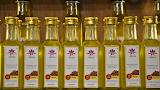
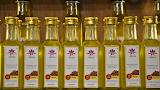
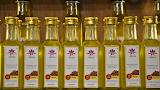

In [24]:
soup

In [45]:
about = driver.find_elements(By.ID,'MainContent')

In [46]:
print(about[0].text)

Amrtamya, the journey began with love for nature and the natural.The dream of building a business that generates a by product that’s all natural and useful for growing natural.The calm and peace of the slow process is far from our professional backgrounds, but the one that’s bringing us closer to people, real problems and making us more sensitive.Our story is stories of our customers who bring back with them the experience and experiments of power of nature. The healing of body and mind is "all within" and "in nature".Our journey has begun with the cold pressed oil. A very important ingredient of the day, a product that’s available in the market but bought with partial satisfaction. We bring this satisfaction with experience of live extraction.The challenges of manufacturing a product that’s chemical and preservatives free are many, as almost a whole generation has grown up on uniform, standard quality. But the nature is different.Our product has "NO" added chemicals, "NO" preservative

## About Page

In [274]:
# To About Page
WebDriverWait(driver,6).until(expected_conditions.element_to_be_clickable((By.ID,"HeaderMenu-about-us"))).click()

In [275]:
About_page = driver.find_element(By.ID,'shopify-section-template--19393857716447__main')
print(About_page.text)

About us
Amrtamya, the journey began with love for nature and the natural.
The dream of building a business that generates a by product that’s all natural and useful for growing natural.
The calm and peace of the slow process is far from our professional backgrounds, but the one that’s bringing us closer to people, real problems and making us more sensitive.
Our story is stories of our customers who bring back with them the experience and experiments of power of nature. The healing of body and mind is "all within" and "in nature".
Our journey has begun with the cold pressed oil. A very important ingredient of the day, a product that’s available in the market but bought with partial satisfaction. We bring this satisfaction with experience of live extraction.
The challenges of manufacturing a product that’s chemical and preservatives free are many, as almost a whole generation has grown up on uniform, standard quality. But the nature is different.
Our product has "NO" added chemicals, "N

## Shop page

In [284]:
# To shop page
WebDriverWait(driver,2).until(expected_conditions.element_to_be_clickable((By.ID,'HeaderMenu-shop'))).click()

In [285]:
all_item_shop = driver.find_elements(By.XPATH,'//*[@id="shopify-section-template--19393857650911__main"]/div/ul')
print(all_item_shop[0].text)

Wellness Oils
Edible Oils
Natural Distilled Water
Essential oils and Attars
After-Bath Body oils


In [286]:
list_of_oil_category = driver.find_elements(By.XPATH,'//*[@id="shopify-section-template--19393857650911__main"]/div/ul')[0]

scraped_data = {'Category':{},'Product_detail':{}}

for item in list_of_oil_category.find_elements(By.TAG_NAME,'li'):
    # Get the link element
    link_elem = item.find_element(By.TAG_NAME, 'a')
    link = link_elem.get_attribute('href')
    name = item.text
    
    # Get the image element (if present)
    try:
        img_elem = item.find_element(By.TAG_NAME, 'img')
        img_src = img_elem.get_attribute('src')
    except:
        img_src = None
    
    scraped_data['Category'].update({name: {'link':link , 'image':img_src}})

    print(f"Name: {name}")
    print(f"Link: {link}")
    print(f"Image: {img_src}")
    print('-' * 40)

Name: Wellness Oils
Link: https://amrtamya.com/collections/wellness-oils
Image: https://amrtamya.com/cdn/shop/collections/FullSizeRender.heic?v=1747669810&width=1500
----------------------------------------
Name: Edible Oils
Link: https://amrtamya.com/collections/edible-oils
Image: https://amrtamya.com/cdn/shop/collections/White-Sesame_1_Litre-Photoroom.jpg?v=1747675066&width=1500
----------------------------------------
Name: Natural Distilled Water
Link: https://amrtamya.com/collections/natural-distilled-water
Image: https://amrtamya.com/cdn/shop/collections/All_Distilled_Water.jpg?v=1708786967&width=1500
----------------------------------------
Name: Essential oils and Attars
Link: https://amrtamya.com/collections/essential-oils-and-attars
Image: https://amrtamya.com/cdn/shop/collections/IMG-4515.jpg?v=1747675953&width=1500
----------------------------------------
Name: After-Bath Body oils
Link: https://amrtamya.com/collections/after-bath-body-oils
Image: https://amrtamya.com/cdn/s

In [ ]:
scraped_data['Category']

{'Wellness Oils': {'link': 'https://amrtamya.com/collections/wellness-oils',
  'image': 'https://amrtamya.com/cdn/shop/collections/FullSizeRender.heic?v=1747669810&width=1500'},
 'Edible Oils': {'link': 'https://amrtamya.com/collections/edible-oils',
  'image': 'https://amrtamya.com/cdn/shop/collections/White-Sesame_1_Litre-Photoroom.jpg?v=1747675066&width=1500'},
 'Natural Distilled Water': {'link': 'https://amrtamya.com/collections/natural-distilled-water',
  'image': 'https://amrtamya.com/cdn/shop/collections/All_Distilled_Water.jpg?v=1708786967&width=1500'},
 'Essential oils and Attars': {'link': 'https://amrtamya.com/collections/essential-oils-and-attars',
  'image': 'https://amrtamya.com/cdn/shop/collections/IMG-4515.jpg?v=1747675953&width=1500'},
 'After-Bath Body oils': {'link': 'https://amrtamya.com/collections/after-bath-body-oils',
  'image': 'https://amrtamya.com/cdn/shop/collections/Afterbath_oils-Photoroom_1.jpg?v=1747674941&width=1500'}}

#### Extracting data from each categorical list 

In [254]:
for key,value in scraped_data['Category'].items():
    print(key)
    print(value)

Wellness Oils
{'link': 'https://amrtamya.com/collections/wellness-oils', 'image': 'https://amrtamya.com/cdn/shop/collections/FullSizeRender.heic?v=1747669810&width=1500'}
Edible Oils
{'link': 'https://amrtamya.com/collections/edible-oils', 'image': 'https://amrtamya.com/cdn/shop/collections/White-Sesame_1_Litre-Photoroom.jpg?v=1747675066&width=1500'}
Natural Distilled Water
{'link': 'https://amrtamya.com/collections/natural-distilled-water', 'image': 'https://amrtamya.com/cdn/shop/collections/All_Distilled_Water.jpg?v=1708786967&width=1500'}
Essential oils and Attars
{'link': 'https://amrtamya.com/collections/essential-oils-and-attars', 'image': 'https://amrtamya.com/cdn/shop/collections/IMG-4515.jpg?v=1747675953&width=1500'}
After-Bath Body oils
{'link': 'https://amrtamya.com/collections/after-bath-body-oils', 'image': 'https://amrtamya.com/cdn/shop/collections/Afterbath_oils-Photoroom_1.jpg?v=1747674941&width=1500'}


Image
Name
Count Purchase
Price

In [287]:
main_window = driver.current_window_handle

for key,value in scraped_data['Category'].items():
    category_link = value['link']

    driver.execute_script(f"window.open('{category_link}', '_blank');")
    time.sleep(2)
    
    driver.switch_to.window(driver.window_handles[-1])

    # At page
    WebDriverWait(driver, 10).until(expected_conditions.presence_of_element_located((By.CLASS_NAME, 'product-grid')))

    # Products under Each Category
    products = driver.find_elements(By.CSS_SELECTOR, ".product-grid .grid__item")

    for product in products:
        link_ele = product.find_element(By.TAG_NAME, "a")
        product_link = link_ele.get_attribute("href")
        # Go to product link
        driver.execute_script(f"window.open('{product_link}', '_blank');")
        time.sleep(2)
        driver.switch_to.window(driver.window_handles[-1])
        time.sleep(2)
        
        # Product Name
        name = driver.find_element(By.CLASS_NAME, "product__title").text

        # Description
        try:
            product_desc = driver.find_element(By.CSS_SELECTOR, ".product__description.rte.quick-add-hidden").text
        except:
            product_desc = None

        # Review/Ratings
        try:
            reviews = driver.find_element(By.CLASS_NAME,'jdgm-prev-badge__text').text
        except:
            reviews = None
        
        try:
            ratings = driver.find_element(By.CLASS_NAME,'jdgm-rev-widg__summary-average').text
        except:
            ratings = None

        # Price
        try:
            price_ele = driver.find_element(By.CLASS_NAME, "price__container")
            price_regular = price_ele.find_element(By.CLASS_NAME, "price__regular").text
        except:
            price_regular = None
        
        # Size
        try:
            size_options = []
            size_ele = driver.find_element(By.ID,'variant-selects-template--19393857781983__main')
            sizes = size_ele.find_elements(By.TAG_NAME ,'input')
            for quantity in sizes:
                size_options.append(quantity.get_attribute('value'))
        except:
            size_options = None    
        
        # Image
        try:
            product_images = []
            image_ele_grid = driver.find_element(By.CLASS_NAME,'product__column-sticky')
            images = image_ele_grid.find_elements(By.TAG_NAME,'img')
            for img in images:
                product_images.append(img.get_attribute('src'))
        except:
            product_images = None

        try:    
            customer_reviews = driver.find_element(By.CLASS_NAME,'jdgm-rev-widg__body').text
        except:
            customer_reviews = None

        # Recomendations
        recommendations = driver.find_elements(By.CSS_SELECTOR, "ul.grid.product-grid > li")
        for rec in recommendations:
            # Product name and link
            try:
                a_tag = rec.find_element(By.CSS_SELECTOR, "a.full-unstyled-link")
                rec_name = a_tag.text.strip()
                rec_link = a_tag.get_attribute("href")
            except:
                rec_name = None
                rec_link = None
            # Product image
            try:
                rec_img = rec.find_element(By.CSS_SELECTOR, "img").get_attribute("src")
            except:
                rec_img = None
            # Product price
            try:
                rec_price = rec.find_element(By.CSS_SELECTOR, ".price-item--regular").text
            except:
                rec_price = None
    
        scraped_data['Product_detail'].update({name:{'Price':price_regular, 
                                                    'Under_Category':key, 
                                                    'Product_link':product_link, 
                                                    'Description':product_desc, 
                                                    'Number_of_Reviews':reviews, 
                                                    'Total_Ratings':ratings, 
                                                    'Avaialble_in':size_options,
                                                    'Product_Images':product_images,
                                                    'Customer_Review':customer_reviews,
                                                    'Recommendations':{'Rec_Link':rec_link,
                                                                        'Product_Name':rec_name,
                                                                        'Product_Image':rec_img,
                                                                        'Price':rec_price}
                                                    }})
        driver.close()  # Close product tab
        driver.switch_to.window(driver.window_handles[-1])  # Switch back to category tab

    driver.close()  # Close category tab
    driver.switch_to.window(main_window)  # Switch back to main window

NameError: name 'rec_link' is not defined

In [ ]:
product-grid-container scroll-trigger animate--slide-in   li tag

grid__item scroll-trigger animate--slide-in  ,class
rating-count caption   ,ratings class
price__container ,class
span, class  price-item price-item--regular | price-item price-item--sale price-item--last

In [280]:
print(driver.find_element(By.CLASS_NAME, "product__title").text)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".product__title"}
  (Session info: chrome=138.0.7204.49); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0x7ff6d5676f65+76917]
	GetHandleVerifier [0x0x7ff6d5676fc0+77008]
	(No symbol) [0x0x7ff6d5429dea]
	(No symbol) [0x0x7ff6d5480256]
	(No symbol) [0x0x7ff6d548050c]
	(No symbol) [0x0x7ff6d54d3887]
	(No symbol) [0x0x7ff6d54a84af]
	(No symbol) [0x0x7ff6d54d065c]
	(No symbol) [0x0x7ff6d54a8243]
	(No symbol) [0x0x7ff6d5471431]
	(No symbol) [0x0x7ff6d54721c3]
	GetHandleVerifier [0x0x7ff6d594d29d+3051437]
	GetHandleVerifier [0x0x7ff6d59478f3+3028483]
	GetHandleVerifier [0x0x7ff6d596588d+3151261]
	GetHandleVerifier [0x0x7ff6d569182e+185662]
	GetHandleVerifier [0x0x7ff6d56996ef+218111]
	GetHandleVerifier [0x0x7ff6d567fae4+112628]
	GetHandleVerifier [0x0x7ff6d567fc99+113065]
	GetHandleVerifier [0x0x7ff6d5666c68+10616]
	BaseThreadInitThunk [0x0x7ffcd372e8d7+23]
	RtlUserThreadStart [0x0x7ffcd4e9c34c+44]


In [ ]:
print(driver.find_element(By.CLASS_NAME,'product-grid').text)
# Not Needed

Hair Regrowth Oil
Vendor:
AMRTAMYAWELLNESS-WELLNESS
Regular price
From Rs. 700.00
Joint Pain Relief Oil
Vendor:
AMRTAMYAWELLNESS
(0)
0 total reviews
Regular price
From Rs. 600.00
Wonder Face Oil
Vendor:
AMRTAMYAWELLNESS
(0)
0 total reviews
Regular price
From Rs. 500.00
Premature Graying
Vendor:
AMRTAMYAWELLNESS
Regular price
From Rs. 500.00
Rejuvenating Massage Oil
Vendor:
AMRTAMYAWELLNESS
(0)
0 total reviews
Regular price
From Rs. 475.00
Baby Massage Oil
Vendor:
AMRTAMYAWELLNESS
Regular price
From Rs. 475.00
Hair Shine & Nourishment
Vendor:
AMRTAMYAWELLNESS-WELLNESS
Regular price
From Rs. 450.00
Anti-Acne - 10 ML Roll-ON
Vendor:
AMRTAMYAWELLNESS
Regular price
Rs. 90.00
After Bath Body Oil- Rose
Vendor:
AMRTAMYAWELLNESS
Regular price
Rs. 1,150.00
After-Bath Body Oil- Mogra
Vendor:
AMRTAMYAWELLNESS
Regular price
From Rs. 950.00
After Bath Sandalwood face and body oil
Vendor:
AMRTAMYAWELLNESS
Regular price
Rs. 1,700.00
Natural Lavender Water
Vendor:
AMRTAMYAWELLNESS
Regular price
From Rs

In [112]:
driver.execute_script(f"window.open('https://amrtamya.com/collections/wellness-oils', '_blank');")
time.sleep(1)
driver.switch_to.window(driver.window_handles[-1])

# At page
WebDriverWait(driver, 10).until(expected_conditions.presence_of_element_located((By.CLASS_NAME, 'product-grid')))

products = driver.find_elements(By.CSS_SELECTOR, ".product-grid .grid__item")

In [132]:
print(products[1].text)

Joint Pain Relief Oil
Vendor:
AMRTAMYAWELLNESS
(0)
0 total reviews
Regular price
From Rs. 600.00


In [127]:
l = products[1].find_element(By.TAG_NAME, "a")

In [128]:
print(l.get_attribute("href"))

https://amrtamya.com/products/joint-pain-relief-oil


In [129]:
driver.execute_script(f"window.open('https://amrtamya.com/products/joint-pain-relief-oil', '_blank');")

In [268]:
name = driver.find_element(By.CLASS_NAME, "product__title").text
print(name)

Hair Regrowth Oil


In [145]:
price_ele = driver.find_element(By.CLASS_NAME, "price__container")
price_regular = price_ele.find_element(By.CLASS_NAME, "price__regular").text
print(price_regular)
price_sale = price_ele.find_element(By.CLASS_NAME, "price__sale").text
print(price_sale)

Regular price
Rs. 600.00



In [146]:
price_sale = price_ele.find_element(By.CLASS_NAME, "price__sale").text
print(price_sale)

In [147]:
reviews = driver.find_element(By.CLASS_NAME,'jdgm-prev-badge__text').text
print(reviews)

1 review


In [161]:
r = driver.find_element(By.CLASS_NAME,'jdgm-rev-widg__summary-average').text
print(r)

5.00 out of 5


In [ ]:
19393857781983__main
19393857781983__main
19393857781983__main

In [152]:
size_ele = driver.find_element(By.ID,'variant-selects-template--19393857781983__main')
sizes = size_ele.find_elements(By.TAG_NAME ,'input')
for i in sizes:
    size = i.get_attribute('value')
    print(size)

100 ML
250 ML
500 ML
1 Litres


In [160]:
desc = driver.find_element(By.CSS_SELECTOR, ".product__description.rte.quick-add-hidden").text
print(desc)

This oil is blended with Castor, Sesame as base oils and contains various heating herbs (nutmeg, nagarmotha, turmeric, garlic extracts etc)  which provide healing properties arising due to arthritis, sciatica, spondylitis, back pain or any kind of body pain. 
As per ayurveda, pain without injury is mostly related to "Vata imbalances" - meaning disturbance of air in the body. 
In order to get best results - the oil should be massaged in a gentle manner at the impacted areas for few minutes (until it penetrates into the skin). Try and cover the impacted area as it promotes heat. Regular use for few days starts to show improvement.
In general, always massage your body with pure oils regularly to avoid "Vata imbalance" and its side effects like body pain.


In [ ]:
# Images
product__column-sticky
product__media media media--transparent
img 
src

In [163]:
image_ele_grid = driver.find_element(By.CLASS_NAME,'product__column-sticky')
images = image_ele_grid.find_elements(By.TAG_NAME,'img')
for i in images:
    link = i.get_attribute('src')
    print(link)

https://amrtamya.com/cdn/shop/files/AC3F83AD-3AA8-43C3-97B0-5A464E280920.png?v=1749550741&width=1946
https://amrtamya.com/cdn/shop/files/BDC84CFD-3976-4533-A995-6B3720D19EB3.png?v=1749987219&width=1946
https://amrtamya.com/cdn/shop/files/C4943CE1-E4FC-4C31-B410-CF85EAD021DA.jpg?v=1749987219&width=1946


In [167]:
# You may also like
also_like_grid = driver.find_elements(By.CLASS_NAME,'grid product-grid grid--4-col-desktop grid--2-col-tablet-down')
print(also_like_grid)

[]


In [184]:
recommendations = driver.find_elements(By.CSS_SELECTOR, "ul.grid.product-grid > li")

for rec in recommendations:
    # Product name and link
    try:
        a_tag = rec.find_element(By.CSS_SELECTOR, "a.full-unstyled-link")
        name = a_tag.text.strip()
        link = a_tag.get_attribute("href")
    except:
        name = None
        link = None
    # Product image
    try:
        img = rec.find_element(By.CSS_SELECTOR, "img").get_attribute("src")
    except:
        img = None
    # Product price
    try:
        price = rec.find_element(By.CSS_SELECTOR, ".price-item--regular").text
    except:
        price = None

    print(f"Name: {name}")
    print(f"Link: {link}")
    print(f"Image: {img}")
    print(f"Price: {price}")
    print("-" * 40)

Name: 
Link: https://amrtamya.com/products/natural-rose-water?pr_prod_strat=jac&pr_rec_id=95e41a5ab&pr_rec_pid=8346570162399&pr_ref_pid=7976264728799&pr_seq=uniform
Image: https://amrtamya.com/cdn/shop/files/609201A8-3F99-45B4-B6BC-785720332725.jpg?v=1746707965&width=533
Price: From Rs. 225.00
----------------------------------------
Name: Anti-Acne - 10 ML Roll-ON
Link: https://amrtamya.com/products/anti-acne-10-ml-roll-on?pr_prod_strat=e5_desc&pr_rec_id=95e41a5ab&pr_rec_pid=7976267645151&pr_ref_pid=7976264728799&pr_seq=uniform
Image: None
Price: Rs. 90.00
----------------------------------------
Name: 
Link: https://amrtamya.com/products/face-body-scrub?pr_prod_strat=jac&pr_rec_id=95e41a5ab&pr_rec_pid=8726272245983&pr_ref_pid=7976264728799&pr_seq=uniform
Image: https://amrtamya.com/cdn/shop/files/74B526BD-7039-4B74-A534-C238DAF4B574.png?v=1746189215&width=533
Price: Rs. 550.00
----------------------------------------
Name: 
Link: https://amrtamya.com/products/baby-massage-oil?pr_prod

In [185]:
d = driver.find_element(By.CLASS_NAME,'jdgm-rev-widg__body').text
print(d)

10/05/2023
DILIPKUMAR TULSIDAS KIRI
Joint Pain Relief Oil


In [266]:
driver.switch_to.window(driver.window_handles[-1])

In [267]:
time.sleep(2)
name = driver.find_element(By.XPATH,'//*[@id="ProductInfo-template--19393857781983__main"]/div[1]')
# nname_ = name.find_element(By.CLASS_NAME,'product__title').text

print(name.text)

Hair Regrowth Oil


In [ ]:
id="ProductInfo-template--19393857781983__main"
id="ProductInfo-template--19393857781983__main"
id="ProductInfo-template--19393857781983__main"

In [ ]:
//*[@id="ProductInfo-template--19393857781983__main"]/div[1]
//*[@id="ProductInfo-template--19393857781983__main"]/div[1]

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="ProductInfo-template--19393857781983__main"]"}
  (Session info: chrome=138.0.7204.49); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0x7ff6d5676f65+76917]
	GetHandleVerifier [0x0x7ff6d5676fc0+77008]
	(No symbol) [0x0x7ff6d5429dea]
	(No symbol) [0x0x7ff6d5480256]
	(No symbol) [0x0x7ff6d548050c]
	(No symbol) [0x0x7ff6d54d3887]
	(No symbol) [0x0x7ff6d54a84af]
	(No symbol) [0x0x7ff6d54d065c]
	(No symbol) [0x0x7ff6d54a8243]
	(No symbol) [0x0x7ff6d5471431]
	(No symbol) [0x0x7ff6d54721c3]
	GetHandleVerifier [0x0x7ff6d594d29d+3051437]
	GetHandleVerifier [0x0x7ff6d59478f3+3028483]
	GetHandleVerifier [0x0x7ff6d596588d+3151261]
	GetHandleVerifier [0x0x7ff6d569182e+185662]
	GetHandleVerifier [0x0x7ff6d56996ef+218111]
	GetHandleVerifier [0x0x7ff6d567fae4+112628]
	GetHandleVerifier [0x0x7ff6d567fc99+113065]
	GetHandleVerifier [0x0x7ff6d5666c68+10616]
	BaseThreadInitThunk [0x0x7ffcd372e8d7+23]
	RtlUserThreadStart [0x0x7ffcd4e9c34c+44]


In [250]:
name = driver.find_element(By.CLASS_NAME, "product__title").text
print(name)

Hair Regrowth Oil
